# Project Background

What am I setting out to do with this project?

The Nfl has slowly become a passing league with more yards being gained through the air then any other time in history. This has been because of increase in using more complicate passing defense. I wanted to take a look if we could cluster pass catchers together by their depth of targets and how much they were able to gain once securing the ball. 

# The Dataset


This dataset was scrapped from the website profootballrefrence with the aid of Ryurko R wrapper which makes simple to pull stats from the website. I used the play by play data of three seasons. 

"""The dataset contains 135946 plays and is accompanied with 256 columns. ""


In [1]:
# Importing required libraries 
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import glob
import plotly.express as px


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
# Set plot preference
plt.style.use(style='ggplot')

In [2]:
files = glob.glob('*.csv')

In [3]:
dfs = []
for file in files:
    df = pd.read_csv(file)
    dfs.append(df)

C:\Users\Kwasi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning:

Columns (167,168,169,170,175,176,179,180,183,184,189,190,191,192,195,196,204,205,206,219,220,221,222,223,224,227,228,232,233,234,239,241,242) have mixed types. Specify dtype option on import or set low_memory=False.



In [4]:
nfl = pd.concat(dfs, sort=False)

print(f'This dataset is {len(nfl)}')
pd.set_option('display.max_columns', len(nfl.columns))
pd.options.display.max_info_columns = 110
pd.set_option('display.max_rows', 100)

nfl.head()

This dataset is 45546


,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,home_wp_post,away_wp_post,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,receiver_player_id,receiver_player_name,rusher_player_id,rusher_player_name,lateral_receiver_player_id,lateral_receiver_player_name,lateral_rusher_player_id,lateral_rusher_player_name,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tackle_2_player_id,assist_tackle_2_player_name,assist_tackle_2_team,assist_tackle_3_player_id,assist_tackle_3_player_name,assist_tackle_3_team,assist_tackle_4_player_id,assist_tackle_4_player_name,as

In [5]:
nfl.play_type.value_counts()

pass           19063
run            13021
no_play         4444
kickoff         2587
punt            2150
extra_point     1193
field_goal       979
qb_kneel         397
qb_spike          72
Name: play_type, dtype: int64

In [6]:
#The initial Dataframe with everything in it 
nfl

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,home_wp_post,away_wp_post,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,receiver_player_id,receiver_player_name,rusher_player_id,rusher_player_name,lateral_receiver_player_id,lateral_receiver_player_name,lateral_rusher_player_id,lateral_rusher_player_name,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tackle_2_player_id,assist_tackle_2_player_name,assist_tackle_2_team,assist_tackle_3_player_id,assist_tackle_3_player_name,assist_tackle_3_team,assist_tackle_4_player_id,assist_tackle_4_player_name,as

In [7]:
#Subsetting out just the pass plays 
nfl = nfl.loc[nfl['play_type'] == 'pass']


In [8]:
#Getting the WR target information as well as catch percentage 
wrs_targets = nfl.groupby('receiver_player_name')['complete_pass'].agg(['mean','size','sum'])

wrs_targets.head()


,mean,size,sum
receiver_player_name,,,
A.Abdullah,0.714286,21,15.0
A.Armah,1.000000,2,2.0
A.Auclair,0.333333,3,1.0
A.Beck,0.750000,12,9.0
A.Brown,0.615385,91,56.0


In [9]:
#going to join on receiver 
wrs_targets.columns = ['catch_pct','targets','catches']


In [10]:
nfl = nfl[['pass_touchdown','receiver_player_name','receiver_player_id','complete_pass','air_yards','yards_after_catch','game_date','time']]

In [11]:
nfl.complete_pass.value_counts()

1.0    11331
0.0     7732
Name: complete_pass, dtype: int64

In [176]:
#Dataframe with just the completed passes and revelant columns 
wrscomplete = nfl.loc[nfl['complete_pass'] == 1.0].copy()
# wrscomplete=nfl

In [177]:
wrscomplete

,pass_touchdown,receiver_player_name,receiver_player_id,complete_pass,air_yards,yards_after_catch,game_date,time,explosive_yac,midyac,shortyac,screen,shortroute,intermediateroute,deeproute,deepshots
2,0.0,A.Jones,00-0033293,1.0,-1.0,1.0,2019-09-05,14:33,False,False,True,True,False,False,False,False
21,0.0,T.Cohen,00-0033556,1.0,0.0,1.0,2019-09-05,04:41,False,False,True,False,True,False,False,False
25,0.0,D.Adams,00-0031381,1.0,5.0,0.0,2019-09-05,04:07,False,False,True,False,True,False,False,False
29,0.0,A.Robinson,00-0031428,1.0,3.0,2.0,2019-09-05,02:32,False,False,True,False,True,False,False,False
32,0.0,A.Shaheen,00-0033896,1.0,5.0,1.0,2019-09-05,01:46,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45528,0.0,T.Homer,00-0035594,1.0,-1.0,12.0,2019-12-29,01:52,False,True,False,True,False,False,False,False
45529,0.0,DK.Metcalf,00-0035640,1.0,16.0,8.0,2019-12-29,01:46,False,False,True,False,False,True,False,False
45531,0.0,T.Lockett,00-0032211,1.0,5.0,6.0,2019-12-29,01:33,False,False,True,False,True,False,False,False
45538,0.0,J.Ursua,00-0035597,1.0,11.0,0.0,2019-12-29,00:42,False,False,True,False,False,True,False,False


In [178]:
#binning yards after catch 
wrscomplete['explosive_yac']= wrscomplete['yards_after_catch'] > 20
wrscomplete['midyac'] = wrscomplete['yards_after_catch'].between(10,20)
wrscomplete['shortyac'] = wrscomplete['yards_after_catch'] <10
#Binning air yards 
wrscomplete['screen']= wrscomplete['air_yards'] <0
wrscomplete['shortroute'] = wrscomplete['air_yards'].between(0,10)
wrscomplete['intermediateroute'] = wrscomplete['air_yards'].between(10,20)
wrscomplete['deeproute'] = wrscomplete['air_yards']>20
# wrscomplete['deepshots'] = wrscomplete['air_yards']>=40

wrscomplete.head()

,pass_touchdown,receiver_player_name,receiver_player_id,complete_pass,air_yards,yards_after_catch,game_date,time,explosive_yac,midyac,shortyac,screen,shortroute,intermediateroute,deeproute,deepshots
2,0.0,A.Jones,00-0033293,1.0,-1.0,1.0,2019-09-05,14:33,False,False,True,True,False,False,False,False
21,0.0,T.Cohen,00-0033556,1.0,0.0,1.0,2019-09-05,04:41,False,False,True,False,True,False,False,False
25,0.0,D.Adams,00-0031381,1.0,5.0,0.0,2019-09-05,04:07,False,False,True,False,True,False,False,False
29,0.0,A.Robinson,00-0031428,1.0,3.0,2.0,2019-09-05,02:32,False,False,True,False,True,False,False,False
32,0.0,A.Shaheen,00-0033896,1.0,5.0,1.0,2019-09-05,01:46,False,False,True,False,True,False,False,False


In [179]:
#Aggregation of the players by wr name 

wrsagg = wrscomplete.groupby('receiver_player_name').agg(['max','min','mean','std'])
wrsagg.head()


pass_touchdown                          complete_pass  \
                                max  min      mean       std           max   
receiver_player_name                                                         
A.Abdullah                      1.0  0.0  0.066667  0.258199           1.0   
A.Armah                         0.0  0.0  0.000000  0.000000           1.0   
A.Auclair                       0.0  0.0  0.000000       NaN           1.0   
A.Beck                          1.0  0.0  0.111111  0.333333           1.0   
A.Brown                         1.0  0.0  0.160714  0.370591           1.0   

                                    air_yards                             \
                      min mean  std       max  min       mean        std   
receiver_player_name                                                       
A.Abdullah            1.0  1.0  0.0       5.0 -5.0   0.600000   2.823372   
A.Armah               1.0  1.0  0.0       3.0 -4.0  -0.500000   4.949747   
A.Auclair             1.0  1.0  NaN       3.0  3.0   3.000000        NaN   
A.Beck                1.0  1.0  0.0      12.0 -5.0   2.555556   5.659309   
A.Brown               1.0  1.0  0.0      47.0 -3.0  11.339286  10.598931   

                     yards_after_catch                            \
                                   max  min      mean        std   
receiver_player_name                                               
A.Abdullah                        11.0  0.0  5.266667   4.300609   
A.Armah                            6.0  1.0  3.500000   3.535534   
A.Auclair                          8.0  8.0  8.000000        NaN   
A.Beck                            19.0  0.0  7.444444   7.019813   
A.Brown                           52.0 -2.0  8.428571  13.215497   

                     explosive_yac                            midyac         \
                               max    min      mean       std    max    min   
receiver_player_name                                                          
A.Abdullah                   False  False  0.000000  0.000000   True  False   
A.Armah                      False  False  0.000000  0.000000  False  False   
A.Auclair                    False  False  0.000000       NaN  False  False   
A.Beck                       False  False  0.000000  0.000000   True  False   
A.Brown                       True  False  0.107143  0.312094   True  False   

                                         shortyac                             \
                          mean       std      max    min      mean       std   
receiver_player_name                                                           
A.Abdullah            0.266667  0.457738     True  False  0.733333  0.457738   
A.Armah               0.000000  0.000000     True   True  1.000000  0.000000   
A.Auclair             0.000000       NaN     True   True  1.000000       NaN   
A.Beck                0.333333  0.500000     True  False  0.666667  0.500000   
A.Brown               0.178571  0.386459     True  False  0.714286  0.455842   

                     screen                            shortroute         \
                        max    min      mean       std        max    min   
receiver_player_name                                                       
A.Abdullah             True  False  0.400000  0.507093       True  False   
A.Armah                True  False  0.500000  0.707107       True  False   
A.Auclair             False  False  0.000000       NaN       True   True   
A.Beck                 True  False  0.444444  0.527046       True  False   
A.Brown                True  False  0.035714  0.187256       True  False   

                                         intermediateroute                   \
                          mean       std               max    min      mean   
receiver_player_name                                                          
A.Abdullah            0.600000  0.507093             False  False  0.000000   
A.Armah               0.500000  0.707107   

In [180]:
wrsagg.columns = wrsagg.columns.to_flat_index()
wrsagg.columns = ['_'.join(t) for t in wrsagg.columns]

In [181]:
#merge my two dataframes 
master_wr = wrs_targets.merge(wrsagg, on='receiver_player_name')

In [182]:
master_wr

,catch_pct,targets,catches,pass_touchdown_max,pass_touchdown_min,pass_touchdown_mean,pass_touchdown_std,complete_pass_max,complete_pass_min,complete_pass_mean,complete_pass_std,air_yards_max,air_yards_min,air_yards_mean,air_yards_std,yards_after_catch_max,yards_after_catch_min,yards_after_catch_mean,yards_after_catch_std,explosive_yac_max,explosive_yac_min,explosive_yac_mean,explosive_yac_std,midyac_max,midyac_min,midyac_mean,midyac_std,shortyac_max,shortyac_min,shortyac_mean,shortyac_std,screen_max,screen_min,screen_mean,screen_std,shortroute_max,shortroute_min,shortroute_mean,shortroute_std,intermediateroute_max,intermediateroute_min,intermediateroute_mean,intermediateroute_std,deeproute_max,deeproute_min,deeproute_mean,deeproute_std,deepshots_max,deepshots_min,deepshots_mean,deepshots_std
receiver_player_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A.Abdullah,0.714286,21,15.0,1.0,0.0,0.066667,0.258199,1.0,1.0,1.0,0.0,5.0,-5.0,0.600000,2.823372,11.0,0.0,5.266667,4.300609,False,False,0.000000,0.000000,True,False,0.266667,0.457738,True,False,0.733333,0.457738,True,False,0.400000,0.507093,True,False,0.600000,0.507093,False,False,0.000000,0.000000,False,False,0.00000,0.000000,False,False,0.000000,0.000000
A.Armah,1.000000,2,2.0,0.0,0.0,0.000000,0.000000,1.0,1.0,1.0,0.0,3.0,-4.0,-0.500000,4.949747,6.0,1.0,3.500000,3.535534,False,False,0.000000,0.000000,False,False,0.000000,0.000000,True,True,1.000000,0.000000,True,False,0.500000,0.707107,True,False,0.500000,0.707107,False,False,0.000000,0.000000,False,False,0.00000,0.000000,False,False,0.000000,0.000000
A.Auclair,0.333333,3,1.0,0.0,0.0,0.000000,NaN,1.0,1.0,1.0,NaN,3.0,3.0,3.000000,NaN,8.0,8.0,8.000000,NaN,False,False,0.000000,NaN,False,False,0.000000,NaN,True,True,1.000000,NaN,False,False,0.000000,NaN,True,True,1.000000,NaN,False,False,0.000000,NaN,False,False,0.00000,NaN,False,False,0.000000,NaN
A.Beck,0.750000,12,9.0,1.0,0.0,0.111111,0.333333,1.0,1.0,1.0,0.0,12.0,-5.0,2.555556,5.659309,19.0,0.0,7.444444,7.019813,False,False,0.000000,0.000000,True,False,0.333333,0.500000,True,False,0.666667,0.500000,True,False,0.444444,0.527046,True,False,0.444444,0.527046,True,False,0.111111,0.333333,False,False,0.00000,0.000000,False,False,0.000000,0.000000
A.Brown,0.615385,91,56.0,1.0,0.0,0.160714,0.370591,1.0,1.0,1.0,0.0,47.0,-3.0,11.339286,10.598931,52.0,-2.0,8.428571,13.215497,True,False,0.107143,0.312094,True,False,0.178571,0.386459,True,False,0.714286,0.455842,True,False,0.035714,0.187256,True,False,0.482143,0.504203,True,False,0.410714,0.496416,True,False,0.12500,0.333712,True,False,0.053571,0.227208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Z.Gentry,1.000000,1,1.0,0.0,0.0,0.000000,NaN,1.0,1.0,1.0,NaN,2.0,2.0,2.000000,NaN,2.0,2.0,2.000000,NaN,False,False,0.000000,NaN,False,False,0.000000,NaN,True,True,1.000000,NaN,False,False,0.000000,NaN,True,True,1.000000,NaN,False,False,0.000000,NaN,False,False,0.00000,NaN,False,False,0.000000,NaN
Z.Jones,0.600000,45,27.0,0.0,0.0,0.000000,0.000000,1.0,1.0,1.0,0.0,19.0,-4.0,5.148148,5.565717,10.0,-1.0,2.851852,3.254626,False,False,0.000000,0.000000,True,False,0.074074,0.266880,True,False,0.925926,0.266880,True,False,0.111111,0.320256,True,False,0.703704,0.465322,True,False,0.222222,0.423659,False,False,0.00000,0.000000,False,False,0.000000,0.000000
Z.Line,0.600000,10,6.0,0.0,0.0,0.000000,0.000000,1.0,1.0,1.0,0.0,1.0,-5.0,-1.500000,2.167948,17.0,1.0,7.500000,6.534524,False,False,0.000000,0.000000,True,False,0.333333,0.516398,True,False,0.666667,0.516398,True,False,0.666667,0.516398,True,False,0.333333,0.516398,False,False,0.000000,0.000000,False,False,0.00000,0.000000,False,False,0.000000,0.000000


At this point ive got my full dataframe with the information aggregated on their names.

# Data Cleaning


Dropping columns that I dont need for further analysis. 

In [183]:
#Dropping Text columns because no nlp will be used 
bounced_columns = ['intermediateroute_min','deeproute_std','deeproute_min','deeproute_max','pass_touchdown_max','pass_touchdown_min',
                  'pass_touchdown_std','complete_pass_max','complete_pass_min','complete_pass_std','explosive_yac_max','explosive_yac_min',
                  'explosive_yac_std','midyac_max','midyac_std','shortyac_max','shortyac_min','screen_max','screen_min','shortroute_max',
                  'shortroute_min','shortroute_std','intermediateroute_min','intermediateroute_std','complete_pass_mean','intermediateroute_max','midyac_min','deepshots_min',
                  'deepshots_max','deeproute_std']
master_wr = master_wr.drop(bounced_columns, axis=1)

In [184]:
#Where I can set the target threshold the dataframe. 
mask = master_wr['targets'] >= 43
master_wr = master_wr[mask]

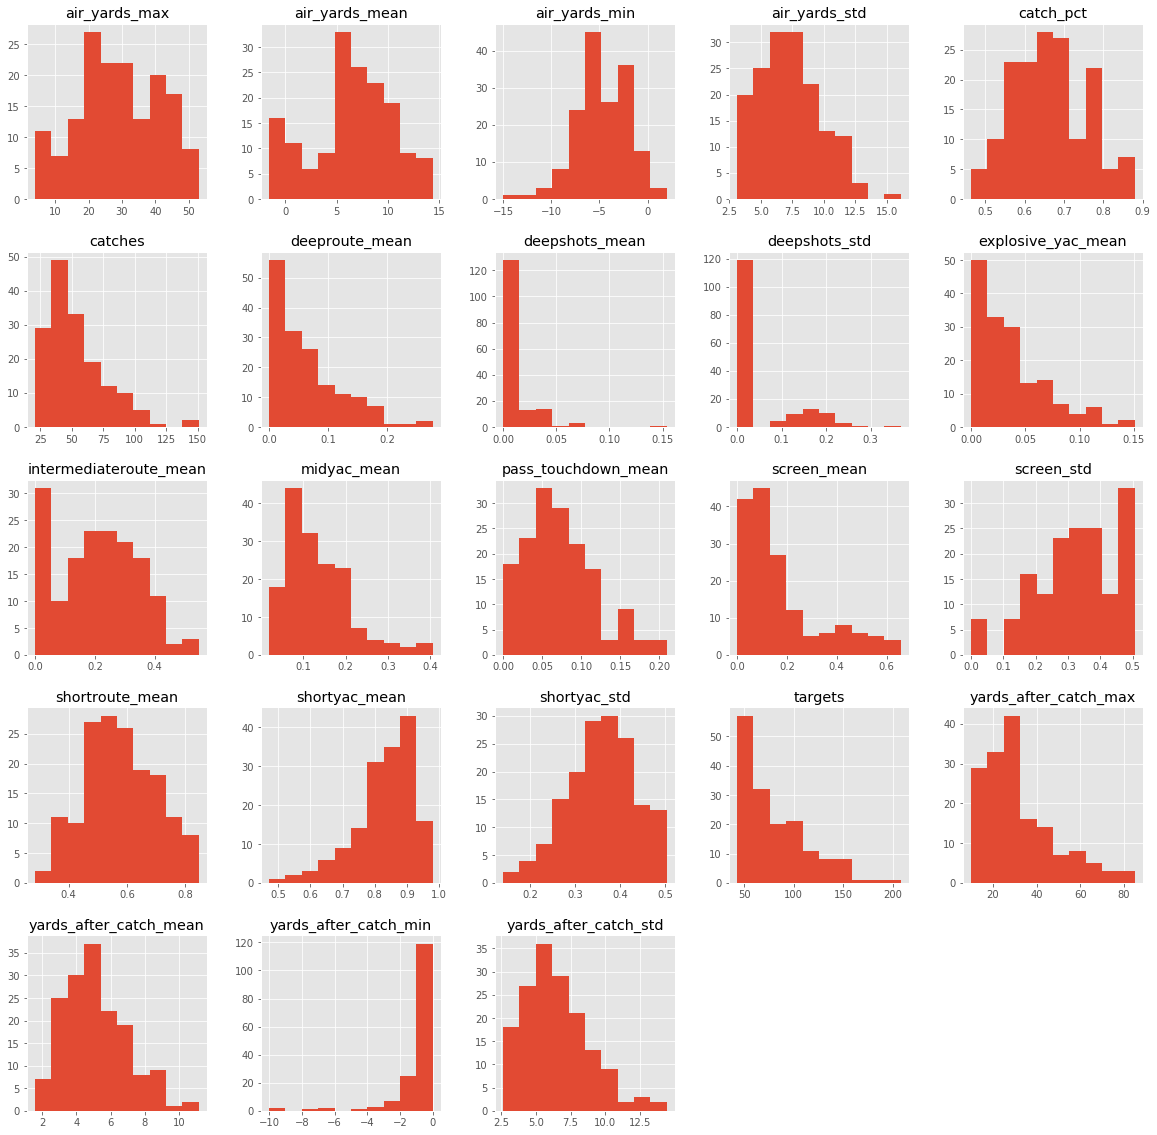

In [185]:
# Plotting the distribution of numerical and boolean categories
master_wr.hist(figsize=(20,20));

In [186]:
#Renaming columns to something more fitting
master_wr = master_wr.rename(columns={"catches" : "receptions", "air_yards_mean" : "avg_airyds","yards_after_catch_mean": "average_yac",
                 "explosive_yac_mean" : "explosive_yac_pct","midyac_mean": "mid_yac_pct", "shortyac_mean":"short_yac_pct"
                          ,"screen_mean":"screen_pct","shortroute_mean":"shortrt_pct","intermediateroute_mean":"intermediatert_pct",
                          "deeproute_mean":"deeprt_pct"})

# Cleaning Individual Columns(Univarete Analysis) 

In [187]:
master_wr

,catch_pct,targets,receptions,pass_touchdown_mean,air_yards_max,air_yards_min,avg_airyds,air_yards_std,yards_after_catch_max,yards_after_catch_min,average_yac,yards_after_catch_std,explosive_yac_pct,mid_yac_pct,short_yac_pct,shortyac_std,screen_pct,screen_std,shortrt_pct,intermediatert_pct,deeprt_pct,deepshots_mean,deepshots_std
receiver_player_name,,,,,,,,,,,,,,,,,,,,,,,
A.Brown,0.615385,91,56.0,0.160714,47.0,-3.0,11.339286,10.598931,52.0,-2.0,8.428571,13.215497,0.107143,0.178571,0.714286,0.455842,0.035714,0.187256,0.482143,0.410714,0.125000,0.053571,0.227208
A.Cooper,0.663866,119,79.0,0.101266,45.0,-15.0,11.531646,8.631836,68.0,-1.0,3.518987,8.682226,0.025316,0.088608,0.886076,0.319749,0.012658,0.112509,0.518987,0.367089,0.126582,0.012658,0.112509
A.Ekeler,0.851852,108,92.0,0.086957,36.0,-7.0,0.576087,6.866440,85.0,0.0,10.217391,11.377466,0.054348,0.380435,0.565217,0.498445,0.434783,0.498445,0.510870,0.032609,0.032609,0.000000,0.000000
A.Erickson,0.551282,78,43.0,0.000000,40.0,-5.0,6.046512,7.444888,32.0,0.0,6.255814,6.736867,0.023256,0.255814,0.720930,0.453850,0.046512,0.213083,0.813953,0.255814,0.023256,0.023256,0.152499
A.Hooper,0.765306,98,75.0,0.080000,27.0,-6.0,6.026667,6.495265,39.0,0.0,4.466667,5.534495,0.013333,0.106667,0.880000,0.327150,0.106667,0.310768,0.666667,0.240000,0.026667,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V.McDonald,0.690909,55,38.0,0.078947,13.0,-5.0,2.657895,3.743653,18.0,0.0,4.526316,4.780234,0.000000,0.157895,0.842105,0.369537,0.210526,0.413155,0.763158,0.026316,0.000000,0.000000,0.000000
W.Fuller,0.700000,70,49.0,0.061224,50.0,-5.0,9.204082,12.592954,31.0,0.0,4.469388,5.788286,0.020408,0.142857,0.836735,0.373438,0.163265,0.373438,0.591837,0.081633,0.183673,0.040816,0.199915
Z.Ertz,0.651852,135,88.0,0.068182,23.0,-1.0,7.397727,5.722590,21.0,-1.0,3.011364,4.416516,0.011364,0.090909,0.897727,0.304743,0.034091,0.182503,0.704545,0.284091,0.011364,0.000000,0.000000


In [188]:
routerunning = master_wr[['shortrt_pct','intermediatert_pct','deeprt_pct','explosive_yac_pct','mid_yac_pct','short_yac_pct','screen_pct','deepshots_mean']]

In [189]:
master_wr

,catch_pct,targets,receptions,pass_touchdown_mean,air_yards_max,air_yards_min,avg_airyds,air_yards_std,yards_after_catch_max,yards_after_catch_min,average_yac,yards_after_catch_std,explosive_yac_pct,mid_yac_pct,short_yac_pct,shortyac_std,screen_pct,screen_std,shortrt_pct,intermediatert_pct,deeprt_pct,deepshots_mean,deepshots_std
receiver_player_name,,,,,,,,,,,,,,,,,,,,,,,
A.Brown,0.615385,91,56.0,0.160714,47.0,-3.0,11.339286,10.598931,52.0,-2.0,8.428571,13.215497,0.107143,0.178571,0.714286,0.455842,0.035714,0.187256,0.482143,0.410714,0.125000,0.053571,0.227208
A.Cooper,0.663866,119,79.0,0.101266,45.0,-15.0,11.531646,8.631836,68.0,-1.0,3.518987,8.682226,0.025316,0.088608,0.886076,0.319749,0.012658,0.112509,0.518987,0.367089,0.126582,0.012658,0.112509
A.Ekeler,0.851852,108,92.0,0.086957,36.0,-7.0,0.576087,6.866440,85.0,0.0,10.217391,11.377466,0.054348,0.380435,0.565217,0.498445,0.434783,0.498445,0.510870,0.032609,0.032609,0.000000,0.000000
A.Erickson,0.551282,78,43.0,0.000000,40.0,-5.0,6.046512,7.444888,32.0,0.0,6.255814,6.736867,0.023256,0.255814,0.720930,0.453850,0.046512,0.213083,0.813953,0.255814,0.023256,0.023256,0.152499
A.Hooper,0.765306,98,75.0,0.080000,27.0,-6.0,6.026667,6.495265,39.0,0.0,4.466667,5.534495,0.013333,0.106667,0.880000,0.327150,0.106667,0.310768,0.666667,0.240000,0.026667,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V.McDonald,0.690909,55,38.0,0.078947,13.0,-5.0,2.657895,3.743653,18.0,0.0,4.526316,4.780234,0.000000,0.157895,0.842105,0.369537,0.210526,0.413155,0.763158,0.026316,0.000000,0.000000,0.000000
W.Fuller,0.700000,70,49.0,0.061224,50.0,-5.0,9.204082,12.592954,31.0,0.0,4.469388,5.788286,0.020408,0.142857,0.836735,0.373438,0.163265,0.373438,0.591837,0.081633,0.183673,0.040816,0.199915
Z.Ertz,0.651852,135,88.0,0.068182,23.0,-1.0,7.397727,5.722590,21.0,-1.0,3.011364,4.416516,0.011364,0.090909,0.897727,0.304743,0.034091,0.182503,0.704545,0.284091,0.011364,0.000000,0.000000


# Exploratory data analysis

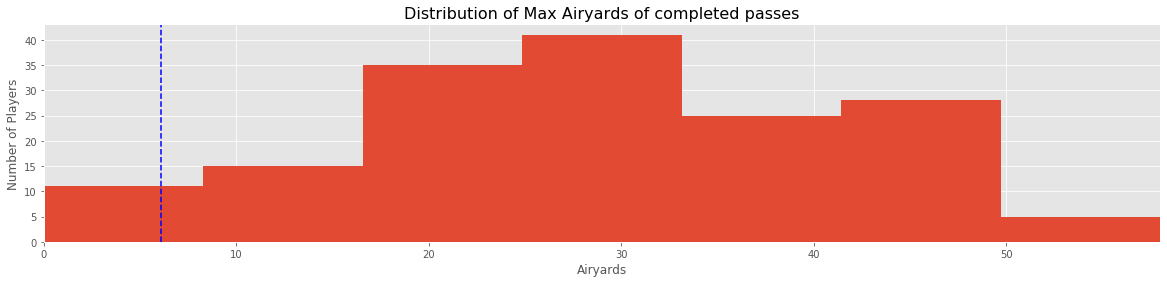

In [190]:
# Distribution of Average Air Yards
plt.figure(figsize=(20,4))
master_wr.air_yards_max.hist(bins=7, range=(0,58))
plt.margins(x=0)
plt.axvline(6.093773, color='blue', linestyle='--')
plt.title("Distribution of Max Airyards of completed passes", fontsize=16)
plt.xlabel("Airyards")
plt.ylabel("Number of Players")
plt.show()

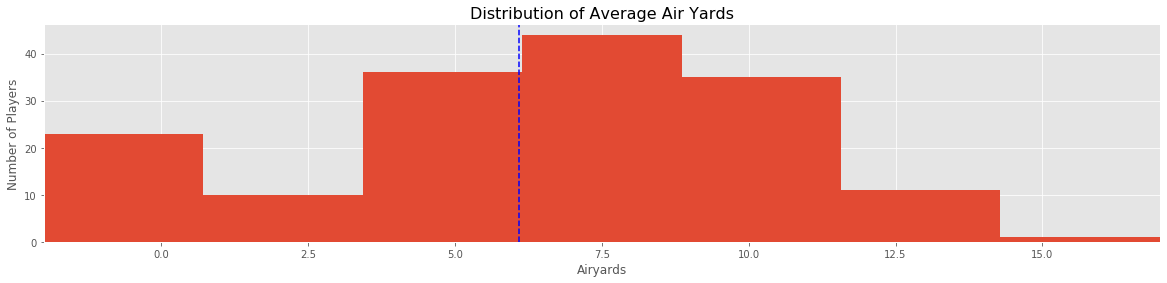

In [191]:
# Distribution of prices from $0 to $1000
plt.figure(figsize=(20,4))
master_wr.avg_airyds.hist(bins=7, range=(-2,17))
plt.margins(x=0)
plt.axvline(6.093773, color='blue', linestyle='--')
plt.title("Distribution of Average Air Yards", fontsize=16)
plt.xlabel("Airyards")
plt.ylabel("Number of Players")
plt.show()

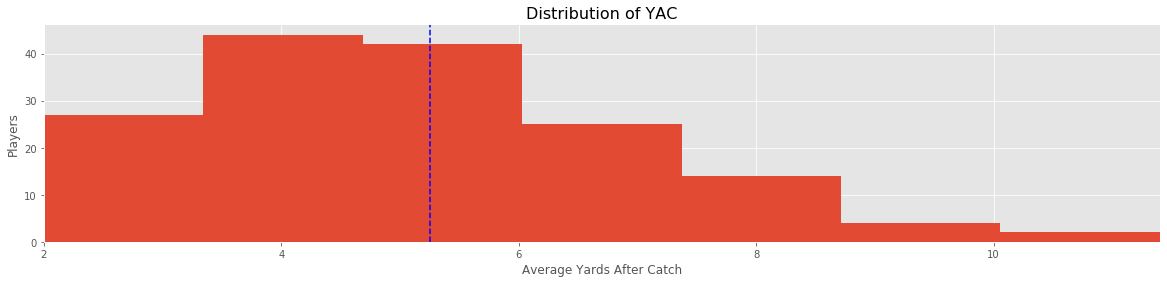

In [192]:
# Distribution of Yards after catch 
plt.figure(figsize=(20,4))
master_wr.average_yac.hist(bins=7, range=(2,11.4))
plt.margins(x=0)
plt.axvline(5.249368, color='blue', linestyle='--')
plt.title("Distribution of YAC", fontsize=16)
plt.xlabel("Average Yards After Catch")
plt.ylabel("Players")
plt.show()

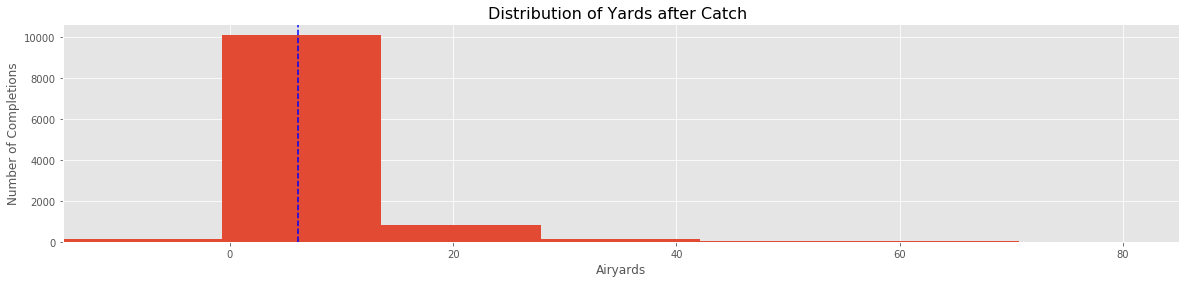

In [193]:
# Distribution of Yards after Catch 
plt.figure(figsize=(20,4))
wrscomplete.yards_after_catch.hist(bins=7, range=(-15,85))
plt.margins(x=0)
plt.axvline(6.093773, color='blue', linestyle='--')
plt.title("Distribution of Yards after Catch ", fontsize=16)
plt.xlabel("Airyards")
plt.ylabel("Number of Completions")
plt.show()

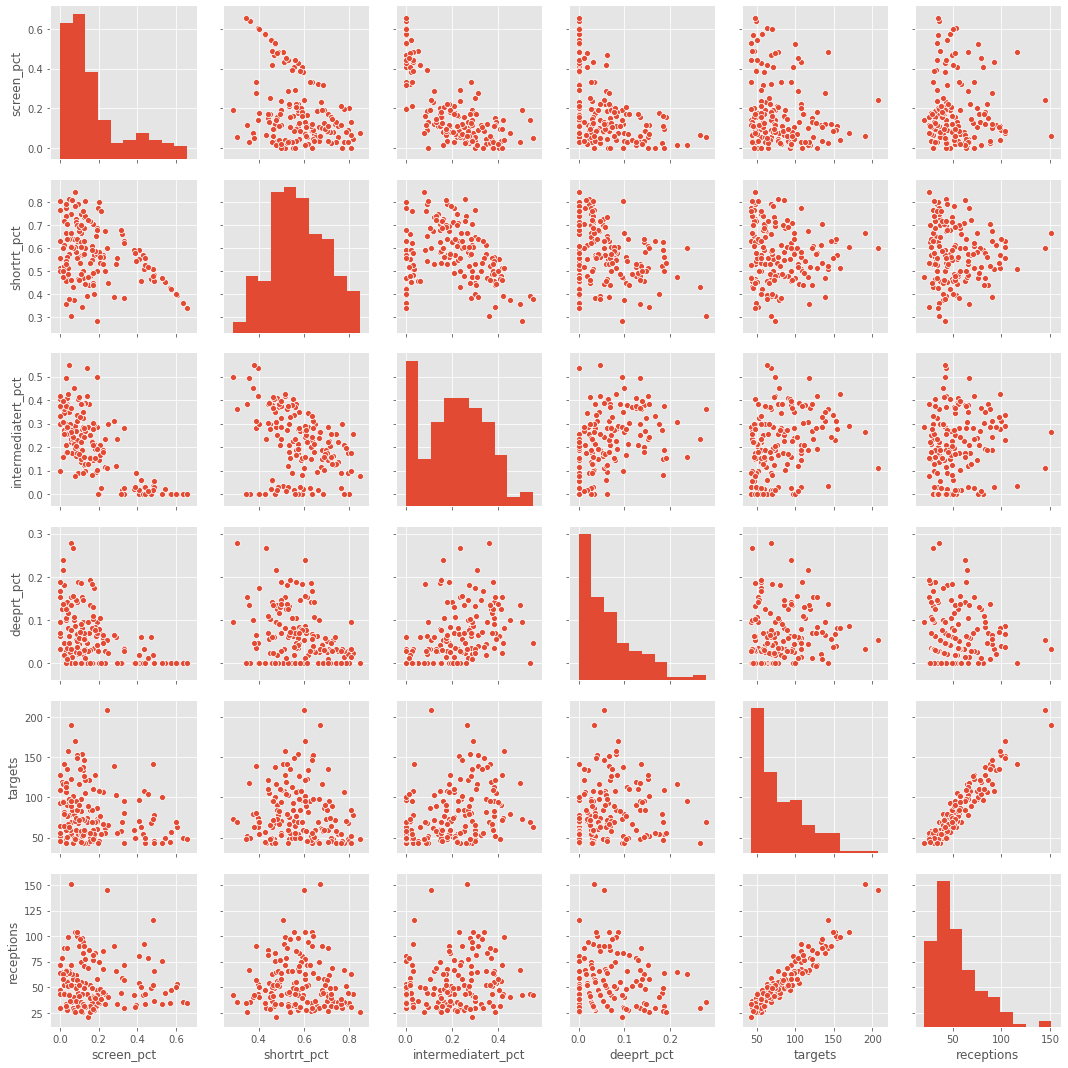

In [194]:
master_wr.columns

plot_cols = ['screen_pct','shortrt_pct', 'intermediatert_pct', 'deeprt_pct','targets', 'receptions']
sns.pairplot(master_wr[plot_cols])

In [195]:
X = master_wr.select_dtypes('number')

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [196]:
pca = PCA(2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

In [197]:
wr_pca = pd.DataFrame(X_pca, columns=['x1', 'x2'], index=master_wr.index)

In [198]:
wr_pca

,x1,x2
receiver_player_name,,
A.Brown,-1.575711,6.036692
A.Cooper,-2.246988,2.295806
A.Ekeler,5.712004,4.215486
A.Erickson,0.172471,0.837544
A.Hooper,-0.026924,-1.190733
...,...,...
V.McDonald,1.792548,-2.829498
W.Fuller,-1.920885,2.062828
Z.Ertz,-1.623810,-2.278961


In [199]:
px.scatter(wr_pca,'x1','x2',hover_name=wr_pca.index)

In [200]:
X = routerunning.select_dtypes('number')

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
pca = PCA(2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

In [201]:
routerunning_pca = pd.DataFrame(X_pca, columns=['x1', 'x2'], index=routerunning.index)

#  Preparing the data for modeling

In [202]:
master_wr.sort_values('targets' ,ascending=False).head(20)

,catch_pct,targets,receptions,pass_touchdown_mean,air_yards_max,air_yards_min,avg_airyds,air_yards_std,yards_after_catch_max,yards_after_catch_min,average_yac,yards_after_catch_std,explosive_yac_pct,mid_yac_pct,short_yac_pct,shortyac_std,screen_pct,screen_std,shortrt_pct,intermediatert_pct,deeprt_pct,deepshots_mean,deepshots_std
receiver_player_name,,,,,,,,,,,,,,,,,,,,,,,
D.Johnson,0.697115,208,145.0,0.082759,37.0,-8.0,4.137931,7.984030,42.0,-2.0,6.420690,6.721306,0.027586,0.227586,0.744828,0.437469,0.241379,0.429403,0.600000,0.110345,0.055172,0.000000,0.000000
M.Thomas,0.794737,190,151.0,0.059603,29.0,-5.0,7.562914,6.204919,32.0,0.0,3.953642,4.835063,0.013245,0.079470,0.907285,0.290998,0.059603,0.237537,0.668874,0.264901,0.033113,0.000000,0.000000
D.Moore,0.611765,170,104.0,0.057692,49.0,-5.0,9.269231,9.045978,35.0,-1.0,4.923077,6.878547,0.048077,0.115385,0.836538,0.371577,0.076923,0.267760,0.605769,0.288462,0.086538,0.009615,0.098058
J.Jones,0.626582,158,99.0,0.060606,47.0,-3.0,10.353535,8.627570,55.0,-2.0,3.727273,7.267229,0.030303,0.070707,0.898990,0.302876,0.040404,0.197907,0.515152,0.424242,0.080808,0.010101,0.100504
A.Robinson,0.636364,154,98.0,0.071429,32.0,-4.0,8.785714,8.017057,29.0,-2.0,2.918367,4.600927,0.010204,0.071429,0.918367,0.275212,0.112245,0.317290,0.571429,0.275510,0.081633,0.000000,0.000000
J.Edelman,0.653595,153,100.0,0.060000,34.0,-4.0,7.970000,6.656743,27.0,-10.0,3.200000,5.171796,0.020000,0.060000,0.920000,0.272660,0.090000,0.287623,0.640000,0.310000,0.040000,0.000000,0.000000
D.Hopkins,0.688742,151,104.0,0.067308,35.0,-4.0,7.384615,8.046356,30.0,-2.0,3.817308,5.140293,0.019231,0.096154,0.884615,0.321033,0.086538,0.282519,0.634615,0.230769,0.067308,0.000000,0.000000
K.Allen,0.697987,149,104.0,0.057692,28.0,-4.0,7.932692,6.617518,33.0,-2.0,3.596154,5.635393,0.028846,0.057692,0.913462,0.282519,0.086538,0.282519,0.557692,0.336538,0.038462,0.000000,0.000000
T.Boyd,0.616438,146,90.0,0.055556,44.0,-9.0,6.555556,8.249087,22.0,-4.0,5.066667,5.664397,0.022222,0.177778,0.800000,0.402241,0.122222,0.329377,0.633333,0.244444,0.055556,0.011111,0.105409


In [203]:
screesort = routerunning.sort_values('screen_pct' ,ascending=False)

In [204]:
screesort

,shortrt_pct,intermediatert_pct,deeprt_pct,explosive_yac_pct,mid_yac_pct,short_yac_pct,screen_pct,deepshots_mean
receiver_player_name,,,,,,,,
P.Lindsay,0.342857,0.000000,0.000000,0.028571,0.200000,0.771429,0.657143,0.000000
N.Chubb,0.361111,0.000000,0.000000,0.083333,0.222222,0.694444,0.638889,0.000000
D.Cook,0.396226,0.000000,0.000000,0.150943,0.377358,0.471698,0.603774,0.000000
K.Drake,0.400000,0.000000,0.000000,0.120000,0.220000,0.660000,0.600000,0.000000
J.Samuels,0.425532,0.000000,0.000000,0.042553,0.276596,0.680851,0.574468,0.000000
...,...,...,...,...,...,...,...,...
T.Ginn,0.633333,0.333333,0.166667,0.000000,0.033333,0.966667,0.000000,0.033333
J.Cook,0.558140,0.372093,0.069767,0.069767,0.139535,0.790698,0.000000,0.000000
D.Parker,0.513889,0.416667,0.152778,0.013889,0.083333,0.902778,0.000000,0.041667


In [205]:

screesort[screesort.index == 'C.McCaffrey']

,shortrt_pct,intermediatert_pct,deeprt_pct,explosive_yac_pct,mid_yac_pct,short_yac_pct,screen_pct,deepshots_mean
receiver_player_name,,,,,,,,
C.McCaffrey,0.508621,0.034483,0.0,0.043103,0.336207,0.62069,0.482759,0.0


# Models 

In [206]:
px.scatter(wr_pca,'x1','x2',hover_name=routerunning_pca.index)

In [207]:
tsne = TSNE(2, perplexity=5, random_state=24)
X_tsne = tsne.fit_transform(X_scaled)

wr_tsne = pd.DataFrame(X_tsne, columns=['x1', 'x2'], index=master_wr.index)

X = wr_tsne[['x1', 'x2']]

clst = DBSCAN(eps=7, min_samples=3)
clst.fit(X)

wr_tsne['clst_label'] = clst.labels_
wr_tsne['clst_label'] = "'" + wr_tsne['clst_label'].astype(str) + "'"

px.scatter(wr_tsne,'x1','x2',hover_name=wr_tsne.index,color='clst_label')

In [208]:
#Make my own centroids 
#put my cluster labels into orginal dataframe and grouby cluster and do analysis 
wr_tsne

,x1,x2,clst_label
receiver_player_name,,,
A.Brown,-30.992144,48.495564,'0'
A.Cooper,-11.100657,30.643438,'0'
A.Ekeler,8.176703,-63.494709,'1'
A.Erickson,11.913370,-22.394947,'2'
A.Hooper,15.896349,7.158365,'2'
...,...,...,...
V.McDonald,29.853025,-7.045512,'2'
W.Fuller,-33.408028,34.335522,'0'
Z.Ertz,18.691404,8.638183,'2'


In [209]:
#merge my two dataframes 
wr_cluster = master_wr.merge(wr_tsne, on='receiver_player_name')

In [210]:
wr_cluster

,catch_pct,targets,receptions,pass_touchdown_mean,air_yards_max,air_yards_min,avg_airyds,air_yards_std,yards_after_catch_max,yards_after_catch_min,average_yac,yards_after_catch_std,explosive_yac_pct,mid_yac_pct,short_yac_pct,shortyac_std,screen_pct,screen_std,shortrt_pct,intermediatert_pct,deeprt_pct,deepshots_mean,deepshots_std,x1,x2,clst_label
receiver_player_name,,,,,,,,,,,,,,,,,,,,,,,,,,
A.Brown,0.615385,91,56.0,0.160714,47.0,-3.0,11.339286,10.598931,52.0,-2.0,8.428571,13.215497,0.107143,0.178571,0.714286,0.455842,0.035714,0.187256,0.482143,0.410714,0.125000,0.053571,0.227208,-30.992144,48.495564,'0'
A.Cooper,0.663866,119,79.0,0.101266,45.0,-15.0,11.531646,8.631836,68.0,-1.0,3.518987,8.682226,0.025316,0.088608,0.886076,0.319749,0.012658,0.112509,0.518987,0.367089,0.126582,0.012658,0.112509,-11.100657,30.643438,'0'
A.Ekeler,0.851852,108,92.0,0.086957,36.0,-7.0,0.576087,6.866440,85.0,0.0,10.217391,11.377466,0.054348,0.380435,0.565217,0.498445,0.434783,0.498445,0.510870,0.032609,0.032609,0.000000,0.000000,8.176703,-63.494709,'1'
A.Erickson,0.551282,78,43.0,0.000000,40.0,-5.0,6.046512,7.444888,32.0,0.0,6.255814,6.736867,0.023256,0.255814,0.720930,0.453850,0.046512,0.213083,0.813953,0.255814,0.023256,0.023256,0.152499,11.913370,-22.394947,'2'
A.Hooper,0.765306,98,75.0,0.080000,27.0,-6.0,6.026667,6.495265,39.0,0.0,4.466667,5.534495,0.013333,0.106667,0.880000,0.327150,0.106667,0.310768,0.666667,0.240000,0.026667,0.000000,0.000000,15.896349,7.158365,'2'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V.McDonald,0.690909,55,38.0,0.078947,13.0,-5.0,2.657895,3.743653,18.0,0.0,4.526316,4.780234,0.000000,0.157895,0.842105,0.369537,0.210526,0.413155,0.763158,0.026316,0.000000,0.000000,0.000000,29.853025,-7.045512,'2'
W.Fuller,0.700000,70,49.0,0.061224,50.0,-5.0,9.204082,12.592954,31.0,0.0,4.469388,5.788286,0.020408,0.142857,0.836735,0.373438,0.163265,0.373438,0.591837,0.081633,0.183673,0.040816,0.199915,-33.408028,34.335522,'0'
Z.Ertz,0.651852,135,88.0,0.068182,23.0,-1.0,7.397727,5.722590,21.0,-1.0,3.011364,4.416516,0.011364,0.090909,0.897727,0.304743,0.034091,0.182503,0.704545,0.284091,0.011364,0.000000,0.000000,18.691404,8.638183,'2'


In [220]:
wr_cluster.sort_values('deepshots_mean',ascending=False).head(30)

,catch_pct,targets,receptions,pass_touchdown_mean,air_yards_max,air_yards_min,avg_airyds,air_yards_std,yards_after_catch_max,yards_after_catch_min,average_yac,yards_after_catch_std,explosive_yac_pct,mid_yac_pct,short_yac_pct,shortyac_std,screen_pct,screen_std,shortrt_pct,intermediatert_pct,deeprt_pct,deepshots_mean,deepshots_std,x1,x2,clst_label
receiver_player_name,,,,,,,,,,,,,,,,,,,,,,,,,,
M.Valdes-Scantling,0.464286,56,26.0,0.076923,47.0,-5.0,11.576923,16.100119,74.0,0.0,5.807692,14.411160,0.038462,0.076923,0.884615,0.325813,0.153846,0.367946,0.538462,0.153846,0.192308,0.153846,0.367946,-27.946199,33.164143,'0'
J.Gordon,0.574468,47,27.0,0.037037,53.0,-3.0,10.518519,13.276267,23.0,0.0,5.259259,6.105436,0.037037,0.185185,0.777778,0.423659,0.111111,0.320256,0.629630,0.148148,0.185185,0.074074,0.266880,-29.441582,34.736267,'0'
S.Diggs,0.663158,95,63.0,0.095238,50.0,-1.0,13.142857,13.180946,30.0,-1.0,4.730159,7.098856,0.031746,0.142857,0.825397,0.382677,0.015873,0.125988,0.603175,0.158730,0.238095,0.063492,0.245805,-29.187820,35.990879,'0'
M.Williams,0.587156,109,64.0,0.046875,48.0,0.0,14.250000,12.011899,53.0,-2.0,4.546875,7.735570,0.015625,0.140625,0.843750,0.365963,0.000000,0.000000,0.500000,0.375000,0.187500,0.062500,0.243975,-23.758875,34.976082,'0'
A.Brown,0.615385,91,56.0,0.160714,47.0,-3.0,11.339286,10.598931,52.0,-2.0,8.428571,13.215497,0.107143,0.178571,0.714286,0.455842,0.035714,0.187256,0.482143,0.410714,0.125000,0.053571,0.227208,-30.992144,48.495564,'0'
E.Sanders,0.673469,98,66.0,0.075758,49.0,-3.0,9.636364,9.243104,26.0,-1.0,3.530303,5.943891,0.030303,0.090909,0.878788,0.328875,0.045455,0.209895,0.575758,0.348485,0.045455,0.045455,0.209895,-18.958460,20.171465,'0'
M.Evans,0.567797,118,67.0,0.119403,46.0,-1.0,13.447761,10.804437,30.0,-1.0,3.820896,5.974505,0.044776,0.074627,0.880597,0.326709,0.029851,0.171460,0.358209,0.492537,0.134328,0.044776,0.208373,-19.718761,31.936501,'0'
M.Brown,0.623377,77,48.0,0.145833,43.0,-8.0,7.645833,11.558343,43.0,0.0,4.854167,9.062407,0.062500,0.041667,0.895833,0.308709,0.208333,0.410414,0.562500,0.166667,0.104167,0.041667,0.201941,-32.103901,27.526628,'0'
D.Parker,0.562500,128,72.0,0.125000,49.0,1.0,12.972222,10.040723,34.0,0.0,3.722222,5.464926,0.013889,0.083333,0.902778,0.298339,0.000000,0.000000,0.513889,0.416667,0.152778,0.041667,0.201229,-21.469725,34.431892,'0'


In [211]:
drop_cols = wr_cluster[['x1','x2']]

In [212]:
wr_cluster.drop(drop_cols, axis=1)

,catch_pct,targets,receptions,pass_touchdown_mean,air_yards_max,air_yards_min,avg_airyds,air_yards_std,yards_after_catch_max,yards_after_catch_min,average_yac,yards_after_catch_std,explosive_yac_pct,mid_yac_pct,short_yac_pct,shortyac_std,screen_pct,screen_std,shortrt_pct,intermediatert_pct,deeprt_pct,deepshots_mean,deepshots_std,clst_label
receiver_player_name,,,,,,,,,,,,,,,,,,,,,,,,
A.Brown,0.615385,91,56.0,0.160714,47.0,-3.0,11.339286,10.598931,52.0,-2.0,8.428571,13.215497,0.107143,0.178571,0.714286,0.455842,0.035714,0.187256,0.482143,0.410714,0.125000,0.053571,0.227208,'0'
A.Cooper,0.663866,119,79.0,0.101266,45.0,-15.0,11.531646,8.631836,68.0,-1.0,3.518987,8.682226,0.025316,0.088608,0.886076,0.319749,0.012658,0.112509,0.518987,0.367089,0.126582,0.012658,0.112509,'0'
A.Ekeler,0.851852,108,92.0,0.086957,36.0,-7.0,0.576087,6.866440,85.0,0.0,10.217391,11.377466,0.054348,0.380435,0.565217,0.498445,0.434783,0.498445,0.510870,0.032609,0.032609,0.000000,0.000000,'1'
A.Erickson,0.551282,78,43.0,0.000000,40.0,-5.0,6.046512,7.444888,32.0,0.0,6.255814,6.736867,0.023256,0.255814,0.720930,0.453850,0.046512,0.213083,0.813953,0.255814,0.023256,0.023256,0.152499,'2'
A.Hooper,0.765306,98,75.0,0.080000,27.0,-6.0,6.026667,6.495265,39.0,0.0,4.466667,5.534495,0.013333,0.106667,0.880000,0.327150,0.106667,0.310768,0.666667,0.240000,0.026667,0.000000,0.000000,'2'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V.McDonald,0.690909,55,38.0,0.078947,13.0,-5.0,2.657895,3.743653,18.0,0.0,4.526316,4.780234,0.000000,0.157895,0.842105,0.369537,0.210526,0.413155,0.763158,0.026316,0.000000,0.000000,0.000000,'2'
W.Fuller,0.700000,70,49.0,0.061224,50.0,-5.0,9.204082,12.592954,31.0,0.0,4.469388,5.788286,0.020408,0.142857,0.836735,0.373438,0.163265,0.373438,0.591837,0.081633,0.183673,0.040816,0.199915,'0'
Z.Ertz,0.651852,135,88.0,0.068182,23.0,-1.0,7.397727,5.722590,21.0,-1.0,3.011364,4.416516,0.011364,0.090909,0.897727,0.304743,0.034091,0.182503,0.704545,0.284091,0.011364,0.000000,0.000000,'2'


In [213]:
mean_wr = wr_cluster.groupby('clst_label').mean()

In [214]:
mean_wr[['screen_pct','intermediatert_pct','shortrt_pct','deeprt_pct','mid_yac_pct','short_yac_pct','explosive_yac_pct','deepshots_mean']]

,screen_pct,intermediatert_pct,shortrt_pct,deeprt_pct,mid_yac_pct,short_yac_pct,explosive_yac_pct,deepshots_mean
clst_label,,,,,,,,
'0',0.080950,0.315136,0.512423,0.126681,0.092228,0.877688,0.030083,0.024611
'1',0.478144,0.019386,0.497886,0.008286,0.246967,0.689564,0.063469,0.000000
'2',0.092325,0.206749,0.699724,0.033350,0.113289,0.870702,0.016008,0.001010
'3',0.165892,0.252597,0.458092,0.146495,0.150824,0.840518,0.008658,0.004329
'4',0.197524,0.323670,0.454002,0.051605,0.131998,0.795879,0.072122,0.000000
'5',0.229496,0.197804,0.549612,0.048380,0.106741,0.872989,0.020270,0.000000
'6',0.262353,0.101404,0.606705,0.035624,0.201103,0.757305,0.041592,0.000000
'7',0.143637,0.115419,0.731580,0.025493,0.079446,0.836310,0.084244,0.000000
